<br></br>
<br></br>
# <center>Data Science and Business Analytics
## <center>✨Task-1: Prediction using Supervised ML
## Name : DIRGH PATEL
<br></br>
<br></br>

In [47]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

**Importing Dataset**

In [48]:
s_data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print("Data has been imported successfully")
s_data.head(10)

Data has been imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Checking general info of Dataset**

In [49]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Checking for null values**

In [50]:
s_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Cheking description of data**

In [51]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Visual Representation of Hours Vs Score**

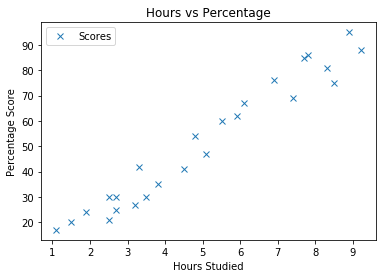

In [52]:
s_data.plot(x='Hours', y='Scores', style='x')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**Visualising Distribution of variables in the Dataset**

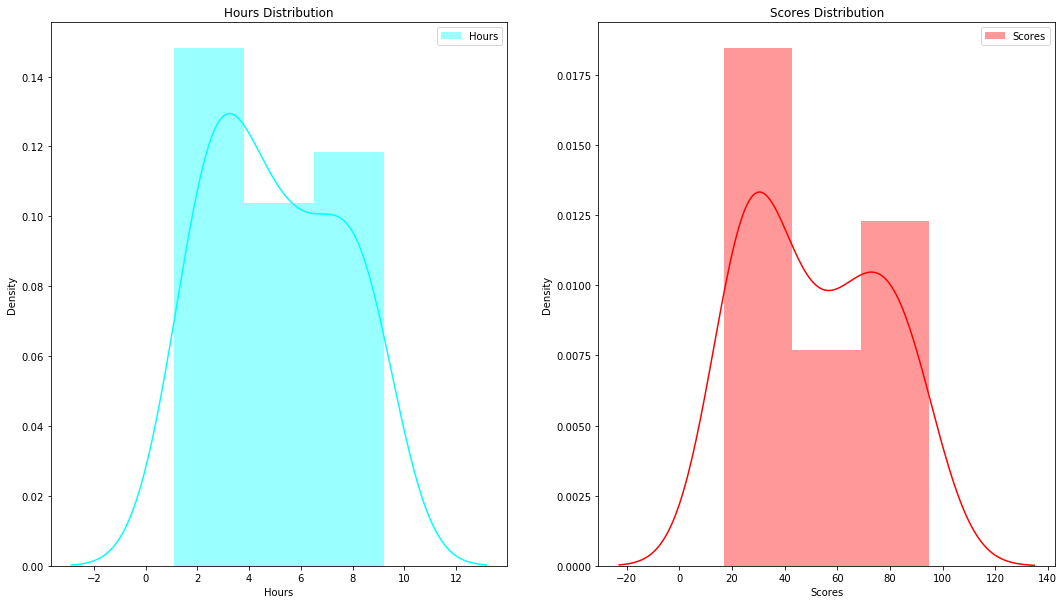

In [53]:
import seaborn as sns
graph=plt.figure(figsize=(18,10))
g1=graph.add_subplot(121)
g2=graph.add_subplot(122)
g1.set_title('Hours Distribution')
g2.set_title('Scores Distribution')
p1=sns.distplot(s_data['Hours'],label='Hours',ax=g1,color='cyan')
p2=sns.distplot(s_data['Scores'],label='Scores',ax=g2,color='red')
p1.legend()
p2.legend()

**Visualizing Relationship between the variables**

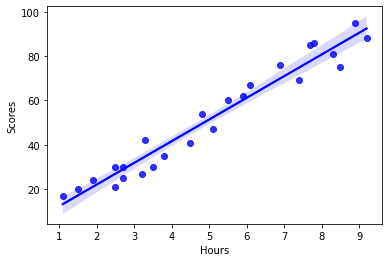

In [54]:
sns.regplot(x=s_data['Hours'],y=s_data['Scores'],color='b')

**Locking The Target Variable & Segregating It From Independent Variables**

In [55]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

**Splitting The Dataset Into Training Set & Test Set**

In [56]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

**Linear Regression Model**

In [57]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("----------Training complete----------")

----------Training complete----------


**Making predictions using LR Model**

In [58]:
LRpred=regressor.predict(X_test)
LRpred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

**Plotting a scatter chart and observing Trending line**

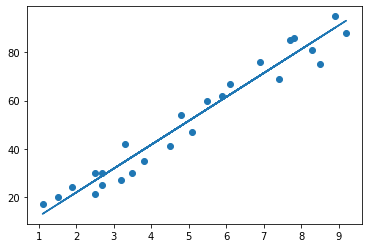

In [59]:
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

**Evaluating LR Model Accuracy: Mean Absolute Error**

In [60]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

LRerr1=mean_absolute_error(LRpred,y_test)
LRerr2=np.sqrt(mean_squared_error(y_test,LRpred))
print('Mean Absolute error in Model 1:',LRerr1.round(2))
print('Root Mean Squared Error in Model 1:',LRerr2.round(2))

Mean Absolute error in Model 1: 4.18
Root Mean Squared Error in Model 1: 4.65


In [61]:
print(X_test)
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


**Comparing Actual Vs Predicted Value of LR Model**

In [62]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Visulaizing The Deviation in Actual & Predicted Values for LR Model**

Text(0.5, 1.0, 'Actual v/s Predicted Values(Linear Regression)')

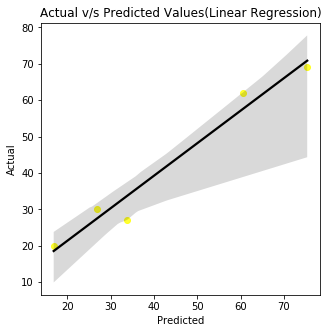

In [63]:
plt.figure(figsize=(5,5))
sns.regplot('Predicted','Actual',data=df,line_kws={'color':'black'},scatter_kws={'color':'yellow'},marker='o')
plt.title('Actual v/s Predicted Values(Linear Regression)')

In [64]:
l = [[0.5]]
own_pred = regressor.predict(l)


In [65]:
print("No of Hours = {}".format(l))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[0.5]]
Predicted Score = 6.973488281755782


In [66]:
hours = [[24]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[24]]
Predicted Score = 239.87391557684845


In [67]:
hours = [[23.9]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[23.9]]
Predicted Score = 238.8828499287842


In [68]:
hours = [[0]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[0]]
Predicted Score = 2.018160041434662


In [69]:
hours = [[5]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[5]]
Predicted Score = 51.57144244464586


In [70]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


**Lasso Regularization Model**

In [71]:
from sklearn.linear_model import Lasso
LSmodel=Lasso(alpha=1,random_state=0)
LSmodel.fit(X_train,y_train)



Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.0001, warm_start=False)

**Making Predications using LS Model**

In [72]:
LSpred=LSmodel.predict(X_test)
LSpred

array([17.48947948, 34.06244335, 75.00741292, 27.23828176, 60.3842095 ])

**Comparing Actual Vs Predicted Value of LS Model**

In [73]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': LSpred})  
df 

,Actual,Predicted
0,20,17.489479
1,27,34.062443
2,69,75.007413
3,30,27.238282
4,62,60.384210


**Visulaizing The Deviation in Actual & Predicted Values for LS Model**

Text(0.5, 1.0, 'Actual v/s Predicted Values (Lasso)')

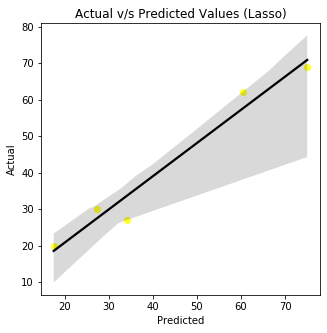

In [74]:
plt.figure(figsize=(5,5))
sns.regplot('Predicted','Actual',data=df,line_kws={'color':'black'},scatter_kws={'color':'yellow'},marker='o')
plt.title('Actual v/s Predicted Values (Lasso)')

**Evaluating LS Model Accuracy: Mean Absolute Error**

In [75]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

LSerr1=mean_absolute_error(LSpred,y_test)
LSerr2=np.sqrt(mean_squared_error(y_test,LSpred))
print('Mean Absolute error in Model 1:',LSerr1.round(2))
print('Root Mean Squared Error in Model 1:',LSerr2.round(2))

Mean Absolute error in Model 1: 3.99
Root Mean Squared Error in Model 1: 4.53


**Ridge Regularization Model**

In [76]:
from sklearn.linear_model import Ridge

RDmodel=Ridge(alpha=1,random_state=0)
RDmodel.fit(X_train,y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=0, solver='auto', tol=0.001)

**Making Predications using RD Model**

In [77]:
RDpred=RDmodel.predict(X_test)
RDpred

array([17.18169996, 33.89456361, 75.18516794, 27.01279622, 60.43852354])

**Comparing Actual Vs Predicted Value of RD Model**

In [78]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': RDpred})  
df 

,Actual,Predicted
0,20,17.181700
1,27,33.894564
2,69,75.185168
3,30,27.012796
4,62,60.438524


**Visulaizing The Deviation in Actual & Predicted Values for RD Model**

Text(0.5, 1.0, 'Actual v/s Predicted Values(Ridge)')

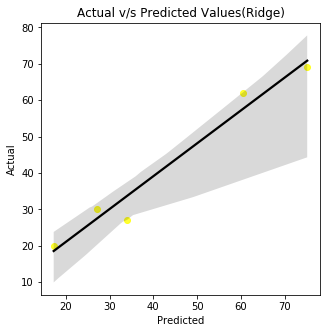

In [79]:
plt.figure(figsize=(5,5))
sns.regplot('Predicted','Actual',data=df,line_kws={'color':'black'},scatter_kws={'color':'yellow'},marker='o')
plt.title('Actual v/s Predicted Values(Ridge)')

**Evaluating RD Model Accuracy: Mean Absolute Error**

In [80]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

RDerr1=mean_absolute_error(RDpred,y_test)
RDerr2=np.sqrt(mean_squared_error(y_test,RDpred))
print('Mean Absolute error in Model 1:',RDerr1.round(2))
print('Root Mean Squared Error in Model 1:',RDerr2.round(2))

Mean Absolute error in Model 1: 4.09
Root Mean Squared Error in Model 1: 4.58


**ElasticNet Model**

In [81]:
from sklearn.linear_model import ElasticNet
ENmodel=ElasticNet(alpha=1)
ENmodel.fit(X_train,y_train)


ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

**Making Predications using EN Model**

In [82]:
ENpred=ENmodel.predict(X_test)
ENpred

array([19.939207  , 35.39865836, 73.59259703, 29.03300192, 59.95190465])

**Comparing Actual Vs Predicted Value of EN Model**

In [83]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': ENpred})  
df 

,Actual,Predicted
0,20,19.939207
1,27,35.398658
2,69,73.592597
3,30,29.033002
4,62,59.951905


**Visulaizing The Deviation in Actual & Predicted Values for EN Model**

Text(0.5, 1.0, 'Actual v/s Predicted Values(ElasticNet)')

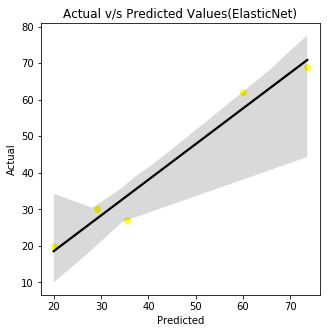

In [84]:
plt.figure(figsize=(5,5))
sns.regplot('Predicted','Actual',data=df,line_kws={'color':'black'},scatter_kws={'color':'yellow'},marker='o')
plt.title('Actual v/s Predicted Values(ElasticNet)')

**Evaluating EN Model Accuracy: Mean Absolute Error**

In [85]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

ENerr1=mean_absolute_error(ENpred,y_test)
ENerr2=np.sqrt(mean_squared_error(y_test,ENpred))
print('Mean Absolute error in Model 1:',ENerr1.round(2))
print('Root Mean Squared Error in Model 1:',ENerr2.round(2))

Mean Absolute error in Model 1: 3.21
Root Mean Squared Error in Model 1: 4.4


**Comparing All Models**

In [86]:
final=pd.DataFrame()
errs=[LRerr1,LSerr1,RDerr1]
final['Valid']=y_test
final['LinearRegression']=LRpred
final['Lasso']=LSpred
final['Ridge']=RDpred
final['ElasticNet']=ENpred

final.head()

,Valid,LinearRegression,Lasso,Ridge,ElasticNet
0,20,16.884145,17.489479,17.181700,19.939207
1,27,33.732261,34.062443,33.894564,35.398658
2,69,75.357018,75.007413,75.185168,73.592597
3,30,26.794801,27.238282,27.012796,29.033002
4,62,60.491033,60.384210,60.438524,59.951905


**Visualizing The Variation In Predicted vs Actual Values in order to draw a conclusion**

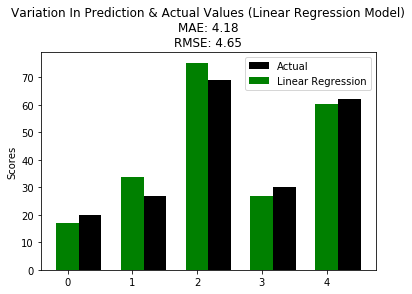

In [87]:
N=np.arange(5)
plt.bar(N+0.35,y_test,width=0.35,label='Actual',color='Black')
plt.bar(N,LRpred,width=0.35,label='Linear Regression',color='green')
plt.ylabel('Scores')
plt.title('Variation In Prediction & Actual Values (Linear Regression Model)\nMAE: {}\nRMSE: {}'.format(LRerr1.round(2),LRerr2.round(2)))
plt.legend(loc='best')
plt.show()


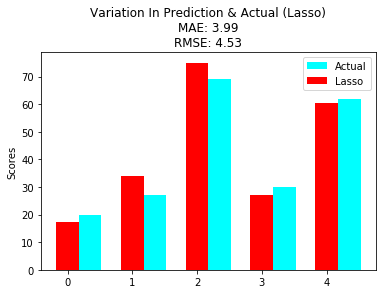

In [88]:
plt.bar(N+0.35,y_test, width=0.35,label='Actual',color='cyan')
plt.bar(N,LSpred,width=0.35,label='Lasso',color='red')
plt.title('Variation In Prediction & Actual (Lasso)\nMAE: {}\nRMSE: {}'.format(LSerr1.round(2),LSerr2.round(2)))
plt.ylabel('Scores')
plt.legend(loc='best')
plt.show()


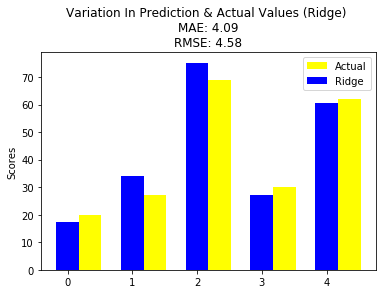

In [89]:
plt.bar(N+0.35,y_test,width=0.35,label='Actual',color='yellow')
plt.bar(N,RDpred,width=0.35,label='Ridge', color='blue')
plt.ylabel('Scores')
plt.title('Variation In Prediction & Actual Values (Ridge) \nMAE: {}\nRMSE: {}'.format(RDerr1.round(2),RDerr2.round(2)))
plt.legend(loc='best')
plt.show()

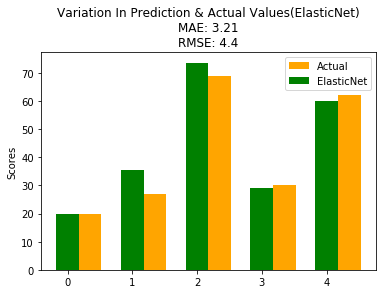

In [90]:
plt.bar(N+0.35,y_test,width=0.35,label='Actual',color='orange')
plt.bar(N,ENpred,width=0.35,label='ElasticNet',color='green')
plt.ylabel('Scores')
plt.title('Variation In Prediction & Actual Values(ElasticNet)\nMAE: {}\nRMSE: {}'.format(ENerr1.round(2),ENerr2.round(2)))
plt.legend(loc='best')
plt.show()


<br></br>
# Completed